### Imports

In [ ]:
# pyspark functions
from pyspark.sql.functions import *
# URL processing
import urllib


In [ ]:
# Define the path to the Delta table
delta_table_path = "dbfs:/user/hive/warehouse/authentication_credentials"

# Read the Delta table to a Spark DataFrame
aws_keys_df = spark.read.format("delta").load(delta_table_path)


In [ ]:

# Get the AWS access key and secret key from the spark dataframe
ACCESS_KEY = aws_keys_df.select('Access key ID').collect()[0]['Access key ID']
SECRET_KEY = aws_keys_df.select('Secret access key').collect()[0]['Secret access key']
# Encode the secrete key
ENCODED_SECRET_KEY = urllib.parse.quote(string=SECRET_KEY, safe="")



### Mount S3 Bucket

In [ ]:
# AWS S3 bucket name
AWS_S3_BUCKET = "user-129bc7e0bd61-bucket"
# Mount name for the bucket
MOUNT_NAME = "/mnt/aws-bucket"
# Source url
SOURCE_URL = "s3n://{0}:{1}@{2}".format(ACCESS_KEY, ENCODED_SECRET_KEY, AWS_S3_BUCKET)
# Mount the drive
dbutils.fs.mount(SOURCE_URL, MOUNT_NAME)


In [ ]:
display(dbutils.fs.ls("/mnt/aws-bucket/"))

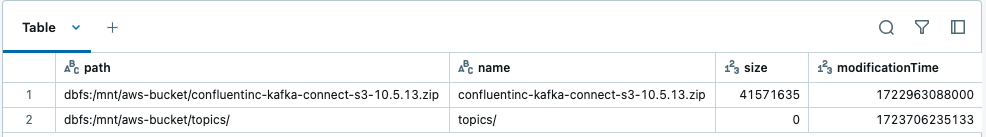

### Read S3 bucket objects into dataframe.

In [ ]:
# File location and type
# Asterisk(*) indicates reading all the content of the specified file that have .json extension
file_location = "/mnt/aws-bucket/topics/129bc7e0bd61.pin/partition=0/*.json" 
file_type = "json"
# Ask Spark to infer the schema
infer_schema = "true"
# Read in JSONs from mounted S3 bucket
df_pin = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.load(file_location)
df_geo = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.load(file_location)
df_user = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.load(file_location)
# Display Spark dataframe to check its content
display(df_pin)
display(df_geo)
display(df_user)

